In [1]:
# LightFM Quickstart
# https://making.lyst.com/lightfm/docs/quickstart.html

import numpy as np
import data

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k

movielens = fetch_movielens()

train, test = movielens['train'], movielens['test']

In [20]:
print(movielens.keys())

dict_keys(['train', 'test', 'item_features', 'item_feature_labels', 'item_labels'])


In [2]:
model = LightFM(loss='warp')
%time model.fit(train, epochs=30, num_threads=8)

CPU times: user 3.59 s, sys: 19.1 ms, total: 3.61 s
Wall time: 461 ms


In [3]:
print("Train precision: %.2f" % precision_at_k(model, train, k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, test, k=5).mean())

train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Train precision: 0.68
Test precision: 0.12
AUC: train 0.95, test 0.91.


In [4]:
def sample_recommendation(model, data, user_ids):


    n_users, n_items = train.shape

    for user_id in user_ids:
        known_positives = data['item_labels'][train.tocsr()[user_id].indices]

        scores = model.predict(user_id, np.arange(n_items))
        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")

        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")

        for x in top_items[:3]:
            print("        %s" % x)

sample_recommendation(model, movielens, [3, 25, 450])

User 3
     Known positives:
        Seven (Se7en) (1995)
        Indiana Jones and the Last Crusade (1989)
        Contact (1997)
     Recommended:
        Air Force One (1997)
        Contact (1997)
        Scream (1996)
User 25
     Known positives:
        Toy Story (1995)
        Twelve Monkeys (1995)
        Dead Man Walking (1995)
     Recommended:
        Rock, The (1996)
        Fargo (1996)
        Twelve Monkeys (1995)
User 450
     Known positives:
        Kolya (1996)
        Devil's Own, The (1997)
        Contact (1997)
     Recommended:
        Murder at 1600 (1997)
        Kiss the Girls (1997)
        Cop Land (1997)


In [5]:
alpha = 1e-3
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1, num_threads=8)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())


adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1, num_threads=8)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())

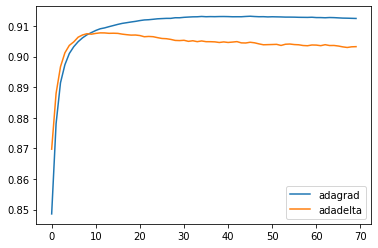

In [6]:
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

In [7]:
alpha = 1e-3
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adagrad',
                        user_alpha=alpha, item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adadelta',
                        user_alpha=alpha, item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())


adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())

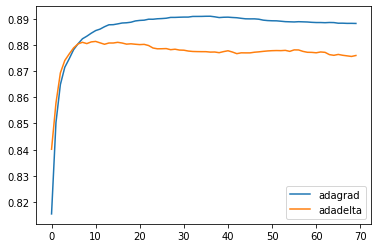

In [8]:
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()